
====== Structuring Element: Rectangular ======


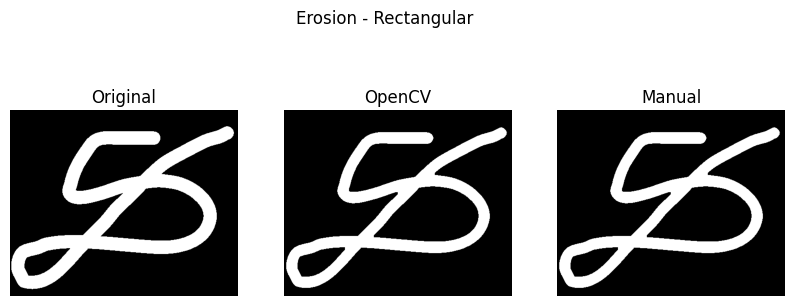

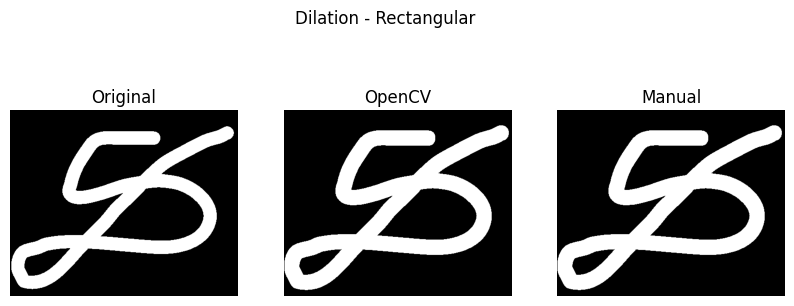

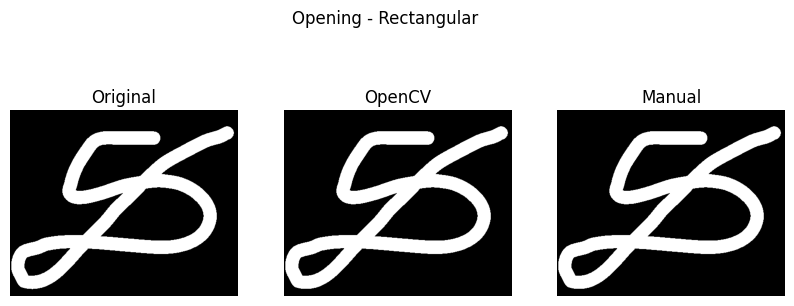

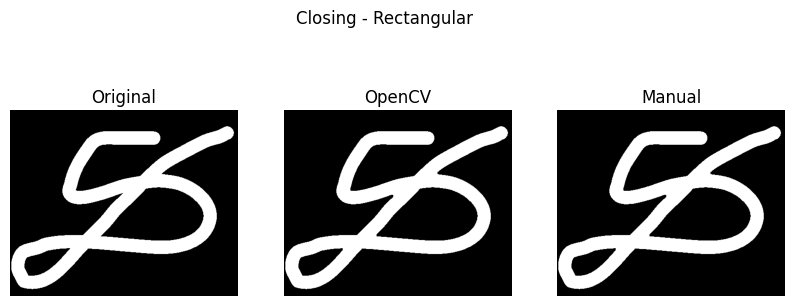

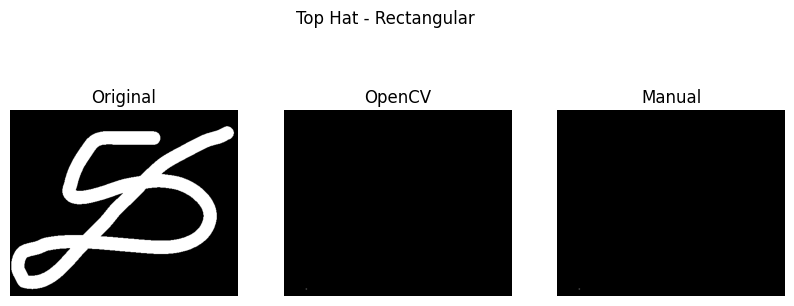

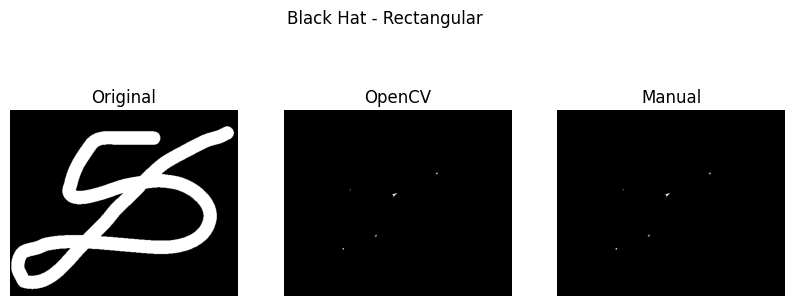


====== Structuring Element: Elliptical ======


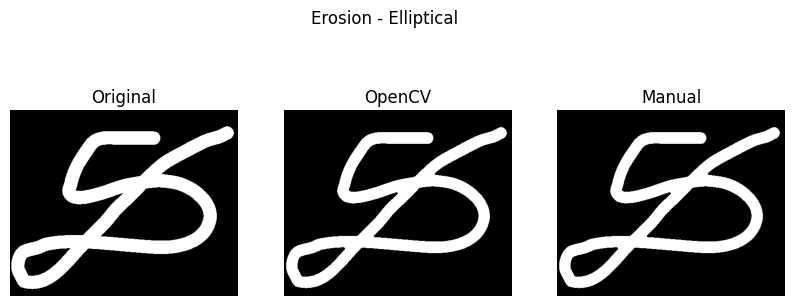

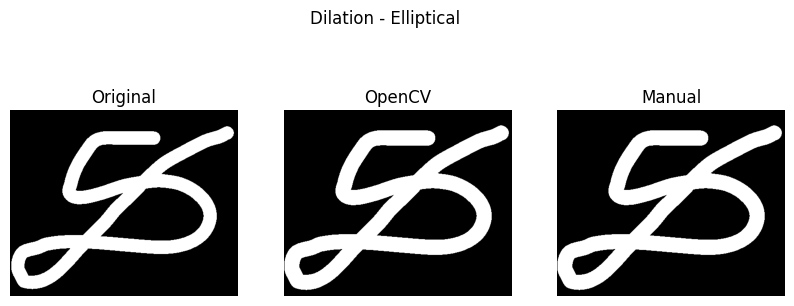

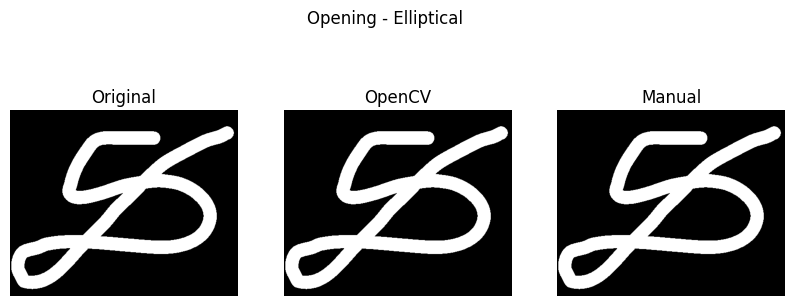

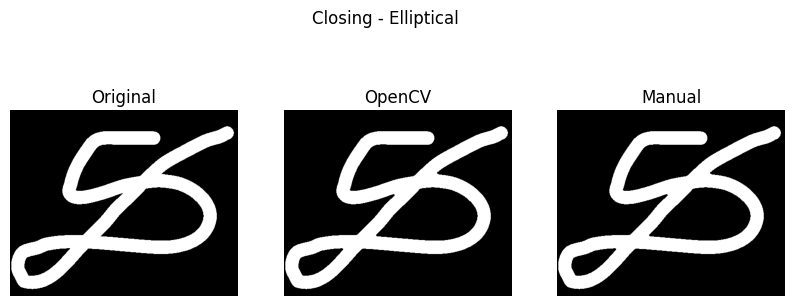

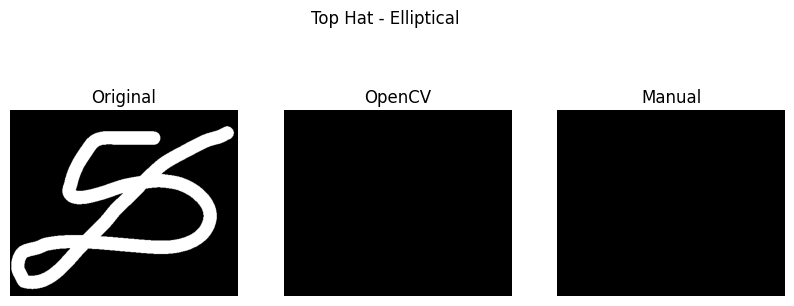

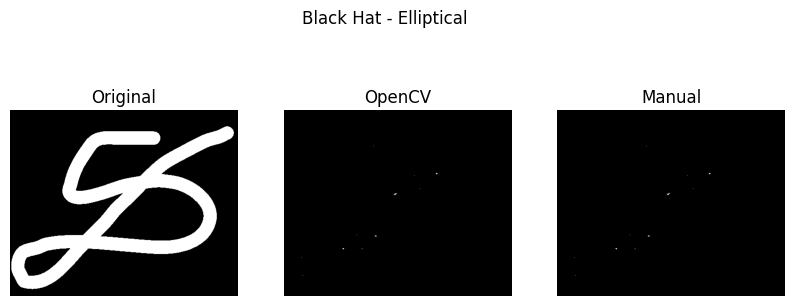


====== Structuring Element: Cross ======


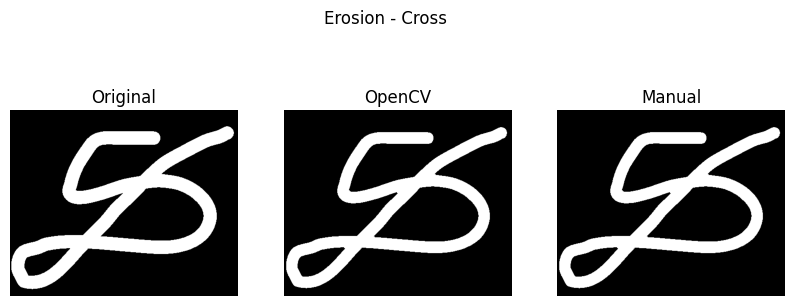

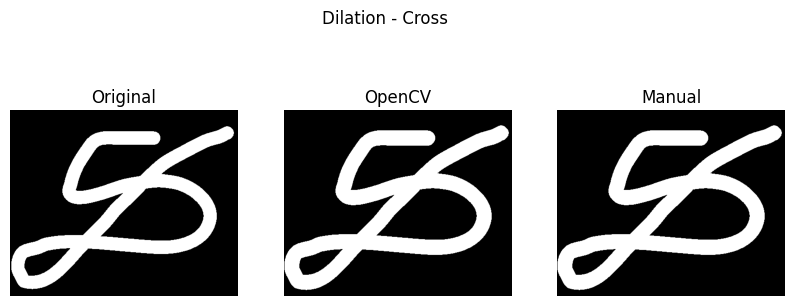

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# ১. ইমেজ লোড
# ==========================
img = cv2.imread("s.png", cv2.IMREAD_GRAYSCALE)  # বাইনারি বা গ্রেস্কেল
_, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# ==========================
# ২. Structuring Elements
# ==========================
rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
diamond = np.array([[0,0,1,0,0],
                    [0,1,1,1,0],
                    [1,1,1,1,1],
                    [0,1,1,1,0],
                    [0,0,1,0,0]], dtype=np.uint8)

elements = {"Rectangular": rect, "Elliptical": ellipse, "Cross": cross, "Diamond": diamond}

# ==========================
# ৩. Scratch functions
# ==========================
def erosion_manual(image, kernel):
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h//2, k_w//2
    padded = cv2.copyMakeBorder(image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_CONSTANT, value=0)
    output = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            roi = padded[i:i+k_h, j:j+k_w]
            output[i,j] = np.min(roi[kernel==1])
    return output

def dilation_manual(image, kernel):
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h//2, k_w//2
    padded = cv2.copyMakeBorder(image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_CONSTANT, value=0)
    output = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            roi = padded[i:i+k_h, j:j+k_w]
            output[i,j] = np.max(roi[kernel==1])
    return output

def opening_manual(image, kernel):
    return dilation_manual(erosion_manual(image, kernel), kernel)

def closing_manual(image, kernel):
    return erosion_manual(dilation_manual(image, kernel), kernel)

def top_hat_manual(image, kernel):
    return cv2.subtract(image, opening_manual(image, kernel))

def black_hat_manual(image, kernel):
    return cv2.subtract(closing_manual(image, kernel), image)

# ==========================
# ৪. Morphological operations
# ==========================
operations = {
    "Erosion": (cv2.erode, erosion_manual),
    "Dilation": (cv2.dilate, dilation_manual),
    "Opening": (lambda img, k: cv2.morphologyEx(img, cv2.MORPH_OPEN, k), opening_manual),
    "Closing": (lambda img, k: cv2.morphologyEx(img, cv2.MORPH_CLOSE, k), closing_manual),
    "Top Hat": (lambda img, k: cv2.morphologyEx(img, cv2.MORPH_TOPHAT, k), top_hat_manual),
    "Black Hat": (lambda img, k: cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, k), black_hat_manual)
}

# ==========================
# ৫. প্রভাব দেখানো
# ==========================
for elem_name, kernel in elements.items():
    print(f"\n====== Structuring Element: {elem_name} ======")
    for op_name, (cv_func, manual_func) in operations.items():
        result_cv = cv_func(img_bin, kernel)
        result_manual = manual_func(img_bin, kernel)
        
        # Plotting
        plt.figure(figsize=(10,4))
        plt.suptitle(f"{op_name} - {elem_name}")
        plt.subplot(1,3,1); plt.imshow(img_bin, cmap='gray'); plt.title("Original"); plt.axis('off')
        plt.subplot(1,3,2); plt.imshow(result_cv, cmap='gray'); plt.title("OpenCV"); plt.axis('off')
        plt.subplot(1,3,3); plt.imshow(result_manual, cmap='gray'); plt.title("Manual"); plt.axis('off')
        plt.show()
